### Name: Sudhir Panwar

### Task: Predict the percentage of an student based on the no. of study hours

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('task1.xlsx')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


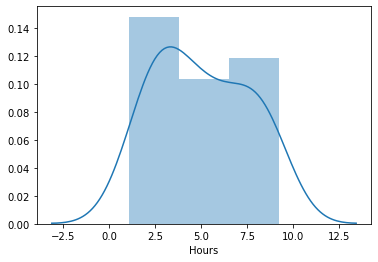

In [8]:
sns.distplot(data['Hours'])

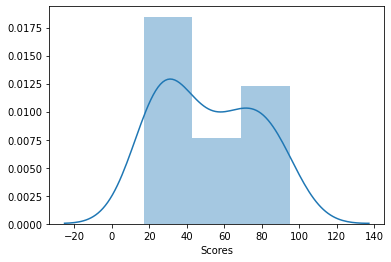

In [12]:
sns.distplot(data['Scores'])

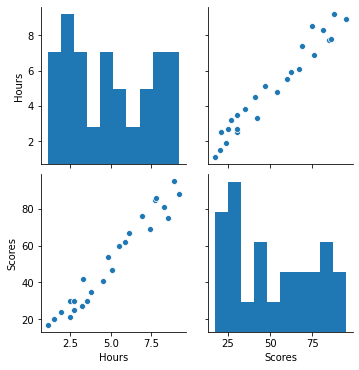

In [9]:
sns.pairplot(data)

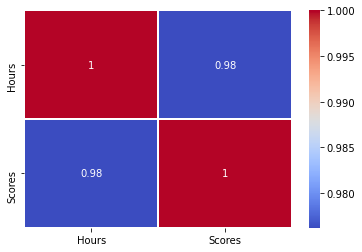

In [72]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidth = 1)

In [3]:
X = data['Hours']                  # input variable
y = data['Scores']                 # output varible

### changing the shape of dataset 

In [25]:
X = np.array(X)

In [28]:
X = X.reshape(-1,1)

### splitting the dataset into train and test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

### using linear_regression model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
print(lm.intercept_)

3.7843079418921874


In [36]:
lm.coef_

array([9.52160608])

In [37]:
pred = lm.predict(X_test)

In [38]:
pred

array([88.52660202, 29.49264435, 69.48338987, 39.96641103, 14.25807463,
       46.63153529, 82.81363837, 29.49264435])

In [41]:
y_test

15    95
20    30
23    76
22    35
14    17
12    41
8     81
9     25
Name: Scores, dtype: int64

In [80]:
plot_df = pd.DataFrame({'y_test': y_test, 'pred': pred})

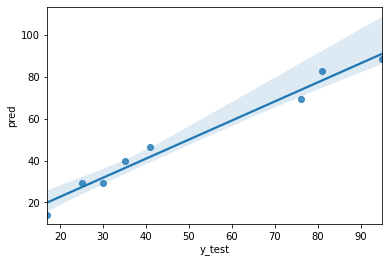

In [86]:
sns.regplot(x = 'y_test', y = 'pred', data = plot_df, fit_reg = True)                    #best fitted data line

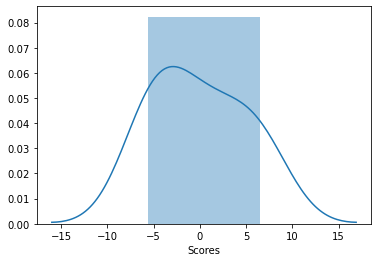

In [47]:
sns.distplot(y_test - pred)                       # residuals plot

### Evaluating the model

In [48]:
from sklearn import metrics                          # minimizing the error b/w y_test and pred

In [54]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

MAE: 4.142939772140698
MSE: 21.499902390056103
RMSE: 4.636798722184963


### Predicted the percentage if a student study for 9.25 hrs/day 

In [66]:
print('No. of Study Hours: {} hr'.format(9.25))
print('Predicted Score: {} %'.format(lm.predict([[9.25]])))

No. of Study Hours: 9.25 hr
Predicted Score: [91.85916415] %


## THE END !